# 다중 회귀
- 다중의 독립 변수가 존재하는 회귀분석
- 여러 개의 독립 변수가 복합적으로 종속 변수에 영향을 미치는 경우 다중 회귀 모형으로 데이터를 예측
- 모델이 복잡해지면 과대 적합이 발생할 가능성이 있으므로, 이를 방지하기 위해 다양한 규제 방식과 그에 따른 모델들 존재
    - 규제 방식에 따라 가중치를 변화 시켜 모델을 단순화한다.
    - 독립 변수에서의 가중치가 0이 되는 차원(컬럼/피쳐)이 생성된다.
    - 규제를 강하게 걸면 가중치의 절대치가 0에 가까워진다.

## 릿지
- 최소제곱 적합식의 수축 페널티라 불리는 항에 L2 페널티를 추가한 것
- 매개 변수
    - <span style="color:#ffd33d">**alpha**</span>
    </br>: 규제의 강도
        - 클수록 회귀 계수가 작아져 과적합 방지, 과소적합 위험
        </br>(너무 크면 모델이 너무 단순해짐)
        - 가장 중요한 매개 변수
        - 기본값: 1.0

    - <span style="color:#ffd33d">**solver**</span>
    </br>: 해를 구하는 방법
        - 데이터의 크기와 희소성에 따라 적합한 solver를 선택
        </br>( 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga' )
        - 중요한 매개 변수
        - 기본값: 'auto'
            - svd : 특이값분해 / 다중공선성 있고 데이터의 개수가 작거나 중간 정도
            - cholesky : 정규방정식 / 데이터의 개수가 작거나 중간 정도
            - lsqr : 반복 최소제곱 / 대규모 데이터 중 희소/밀집 데이터
            - sparse_cg : 공액 기울기법 / 대규모 데이터 중 희소 데이터
            - sag : 확률적 평균 검사 / 데이터의 행의 수가 열의 수보다 월등히 많은 경우
            - saga : sag의 확장 / 대규모 데이터 중 희소 데이터, ElasticNet 지원
    
    - <span style="color:#ffd33d">**tol**</span>
    </br>: 수렴의 판단 기준
        - 작을수록 정밀하지만 속도가 느려질 수 있다.
        - 다중회귀에서는 중요
        - 기본값: 0.001 (1e-03)

    - <span style="color:#ffd33d">**max_iter**</span>
    </br>: 최적화될 때까지의 반복 횟수
        - 데이터가 크거나 수치가 불안정한 경우 필요
        - 기본값: None

- 속성 (class에서 사용하는 변수)
    - <span style="color:#ffd33d">**coef_**</span>
    </br>: 추정된 회귀계수를 출력
        - 규제로 인해, 선형 회귀에 비해 값들이 작게 출력된다.

    - <span style="color:#ffd33d">**n_iter_**</span>
    </br>: solver가 반복한 횟수 출력

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [3]:
diabetes = load_diabetes()

In [4]:
df = pd.DataFrame(diabetes['data'], columns= diabetes['feature_names'])
# 바로 작업할 거니까 타겟 데이터는 굳이 안 넣음
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [6]:
# alpha 값에 따라 회귀계수가 어떻게 변화하는가?
# 반복 실행할 때마다 회귀계수를 추가할 빈 리스트 생성
data = []

for a in alpha:
    # print(a)
    # Ridge class 생성 시 alpha 매개 변수에 a를 대입
    ridge = Ridge(alpha= a)
    # 모델 학습
    ridge.fit(df.values, diabetes['target'])
    # 학습된 모델에서 회귀계수를 출력하여 data에 추가
    data.append(
        ridge.coef_
    )

data

[array([  -9.54916175, -239.08695779,  520.3693746 ,  323.82274522,
        -712.32215918,  413.37912498,   65.81132269,  167.51300694,
         720.9399241 ,   68.12336029]),
 array([  -7.19753448, -234.54976419,  520.58860098,  320.51713055,
        -380.6071353 ,  150.48467052,  -78.58927534,  130.31252148,
         592.34795865,   71.13484405]),
 array([   1.30870543, -207.19241786,  489.69517109,  301.76405786,
         -83.46603399,  -70.8268319 , -188.67889782,  115.7121356 ,
         443.81291747,   86.7493154 ]),
 array([  29.46611189,  -83.15427636,  306.35268015,  201.62773437,
           5.90961437,  -29.51549508, -152.04028006,  117.3117316 ,
         262.94429001,  111.87895644]),
 array([ 19.81284181,  -0.91842974,  75.41621398,  55.02515953,
         19.92462111,  13.94871542, -47.5538158 ,  48.2594332 ,
         70.14394833,  44.21389238])]

In [7]:
df_ridge = pd.DataFrame(data, index= alpha, columns= df.columns)

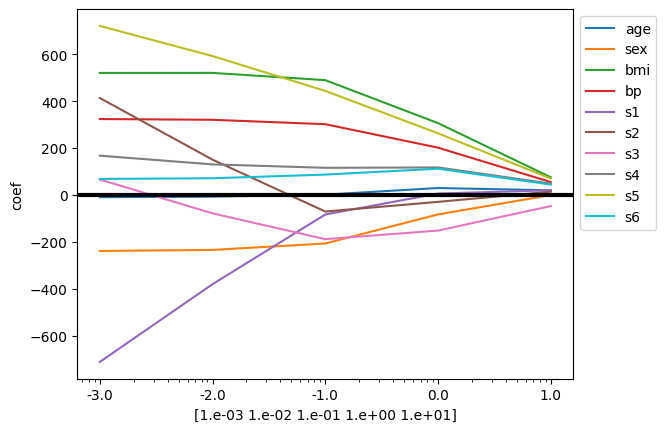

In [8]:
plt.semilogx(df_ridge)
plt.xticks(alpha, labels= np.log10(alpha))
plt.legend(labels= df_ridge.columns, bbox_to_anchor= (1,1))
# x, y축 이름 추가
plt.xlabel(alpha)
plt.ylabel('coef')
# 보조선 추가
plt.axhline(y= 0, color= 'black', linewidth= 3)

plt.show()

In [9]:
# 단순 선형 회귀와 릿지 회귀의 회귀계수 확인
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(
    df.values,
    diabetes['target']
)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


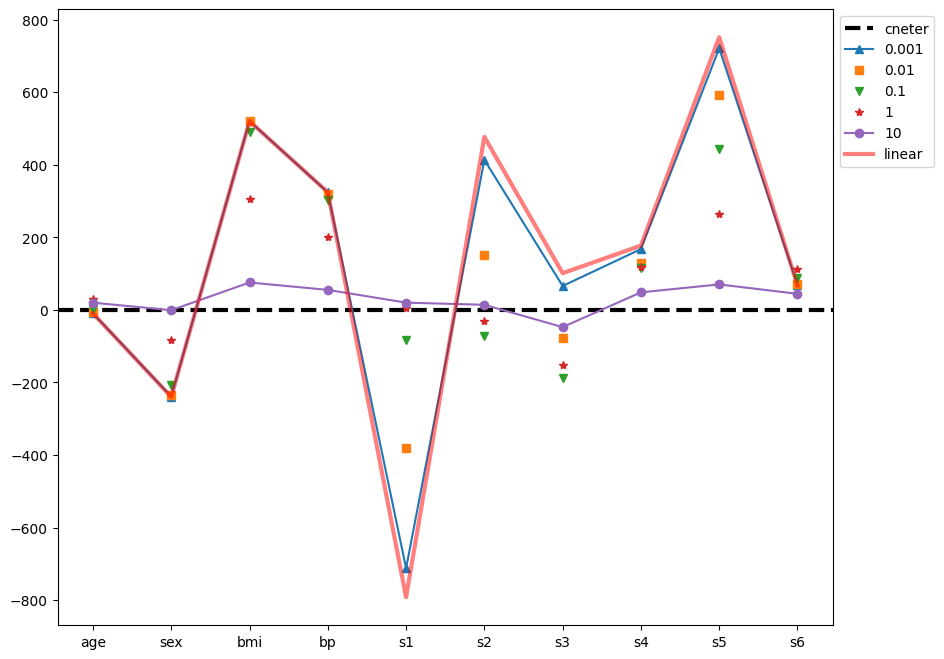

In [10]:
plt.figure(figsize= (10, 8))
plt.axhline(y= 0, linestyle= '--', linewidth= 3, color= 'black')

plt.plot(df_ridge.loc[0.001, ], '^-')
plt.plot(df_ridge.loc[0.01, ], 's')
plt.plot(df_ridge.loc[0.1, ], 'v')
plt.plot(df_ridge.loc[1.0, ], '*')
plt.plot(df_ridge.loc[10.0, ], 'o-')
# alpha의 값이 올라갈수록 0에 가까워지는 것을 확인할 수 있다.

plt.plot(lr.coef_, 'r', linewidth= 3, alpha= 0.5)

plt.legend( ['cneter', 0.001, 0.01, 0.1, 1, 10, 'linear'], bbox_to_anchor= (1, 1) )
# cneter - 다중회귀, linear - 선형회귀, 나머지 - 각 alpha값에 따른 회귀계수값들

plt.show()

---
#### 연습
- train, test 비율은 8:2로 분할
- 단순 선형 회귀로 당뇨 데이터를 학습, 평가해 평가 지표 MSE값을 확인
- 릿지 회귀로 (alpha 값: 0.01, 0.1, 0.1, 1) 당뇨 데이터를 학습, 평가해 평가 지표 MSE값을 확인, 비교

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# 독립 변수, 종속 변수를 x, y에 대입
x = df.values
y = diabetes['target']

In [13]:
# 독립 변수, 종속 변수 데이터를 train:test = 8:2로 분할 
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size= 0.2, random_state= 42
)

In [14]:
# 단순 선형 회귀 class 생성
lr = LinearRegression()

In [15]:
# 생성된 모델에 학습 데이터를 대입하여 학습
lr.fit( X_train, Y_train )

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# 평가 지표 확인을 위해 metrics 안에 있는 MSE, R2 Score 로드
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# alpha 값에 따라 릿지 회귀 모델을 여러 개 생성
ridge_1 = Ridge(alpha= 0.01)
ridge_2 = Ridge(alpha= 0.1)
ridge_3 = Ridge(alpha= 1.0)

In [18]:
# 생성된 모델에 학습 데이터를 대입하여 학습
ridge_1.fit(X_train, Y_train)
ridge_2.fit(X_train, Y_train)
ridge_3.fit(X_train, Y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [19]:
# 학습한 모델들을 이용하여 예측 -> 독립 변수에 대입해 예측값 저장
# 단순 선형 회귀
lr_pred= lr.predict(X_test)
# 릿지 회귀
ridge_1_pred = ridge_1.predict(X_test)
ridge_2_pred = ridge_2.predict(X_test)
ridge_3_pred = ridge_3.predict(X_test)

In [20]:
# 평가 지표 MSE (오차 제곱의 평균)
# 단순 선형 회귀
mse_lr = mean_squared_error(Y_test, lr_pred)
# 릿지 회귀
mse_ridge_1 = mean_squared_error(Y_test, ridge_1_pred)
mse_ridge_2 = mean_squared_error(Y_test, ridge_2_pred)
mse_ridge_3 = mean_squared_error(Y_test, ridge_3_pred)

In [21]:
print(round(mse_lr, 2))
print(round(mse_ridge_1, 2))
print(round(mse_ridge_2, 2))
print(round(mse_ridge_3, 2))

2900.19
2882.29
2856.49
3077.42


In [22]:

r2_lr = r2_score(Y_test, lr_pred)
r2_ridge_1 = r2_score(Y_test, ridge_1_pred)
r2_ridge_2 = r2_score(Y_test, ridge_2_pred)
r2_ridge_3 = r2_score(Y_test, ridge_3_pred)

In [23]:
print(round(r2_lr, 4))
print(round(r2_ridge_1, 4))
print(round(r2_ridge_2, 4))
print(round(r2_ridge_3, 4))

0.4526
0.456
0.4609
0.4192


In [24]:
# X_test의 첫번째 인덱스의 값
X_test[0]
# 선형 회귀 계수
lr.coef_
# 절편
lr.intercept_

np.float64(151.34560453985995)

In [25]:
lr_pred[0]

np.float64(139.54755840379616)

In [26]:
# 이 부분을 predict() 함수가 해주는 것
# 절편 값을 저장
pred_1 = lr.intercept_
for w, x in zip(lr.coef_, X_test[0]):
    # pred_1에 w와 x를 곱한 값을 누적합
    pred_1 += (w*x)

pred_1

np.float64(139.54755840379613)

---

## 라쏘
- 최소 제곱 적합식의 수축 페널티라 불리는 항에 L1 페널티를 추가한 것
- 릿지 회귀에서 변수의 크기가 매우 큰 데이터의 경우 결과를 해석하는 데 어려움이 발생하는 문제를 해결하기 위한 방법
- 매개 변수
    - <span style="color:#ffd33d">**alpha**</span>
    </br>: 규제의 강도
        - 크면 회귀 계수가 0이 되어 과적합 방지, 과소적합 위험
        </br>(너무 크면 많은 컬럼의 회귀 계수가 0이 되어 모델이 너무 단순해짐)
        - 기본값: 1.0
    - <span style="color:#ffd33d">**selection**</span>
    </br>: 좌표축 경사법 업데이트 순서
        - 기본값: 'cyclic'
            - cyclic : 피쳐의 순서대로 순차적으로 업데이트
            - random : 무작위 선택 업데이트
    - <span style="color:#ffd33d">**percompute**</span>
    </br>: 그람 행렬(Gram matrix)을 미리 계산할 것인가?
        - 그람 행렬은 선형대수에서 자주 쓰이는 개념으로, 회귀 분석에서 핵심적인 부분
        - 기본값: auto
    - <span style="color:#ffd33d">**warm_start**</span>
    </br>: 이전의 학습 결과에 이어 학습할 것인가?
        - 기본값: False

In [27]:
from sklearn.linear_model import Lasso

In [28]:
# alpha의 범위를 하나 지정
alpha = np.logspace(-3, 1, 5)
# 모델 학습을 통해 생성되는 회귀 계수를 추가할 빈 리스트 생성
data = []

for a in alpha:
    # print(a)
    lasso = Lasso(alpha= a)
    # 모델 학습
    lasso.fit(df.values, diabetes['target'])
    data.append(lasso.coef_)

lasso_df = pd.DataFrame(data, index= alpha, columns= df.columns)
lasso_df

# 0이 많음 -> 단순한 모델

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


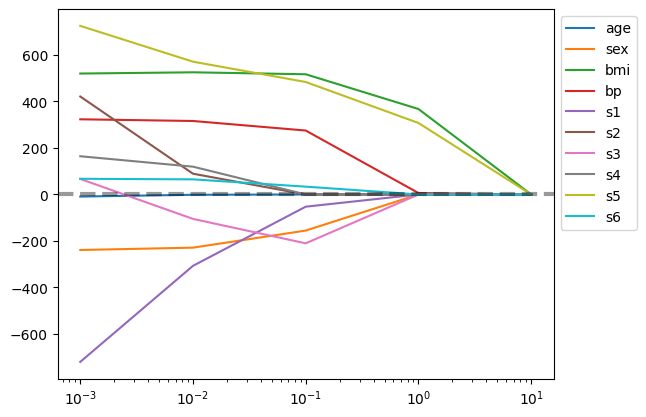

In [29]:
# 회귀 계수를 그래프로 시각화
plt.semilogx(lasso_df)
# y = 0 보조선 추가
plt.axhline(y= 0, linestyle= '--', color= 'black', linewidth= 3, alpha= 0.4)
plt.legend(labels= lasso_df.columns, bbox_to_anchor= (1,1))

plt.show()

In [30]:
lr = LinearRegression()
lr.fit(df.values, diabetes['target'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


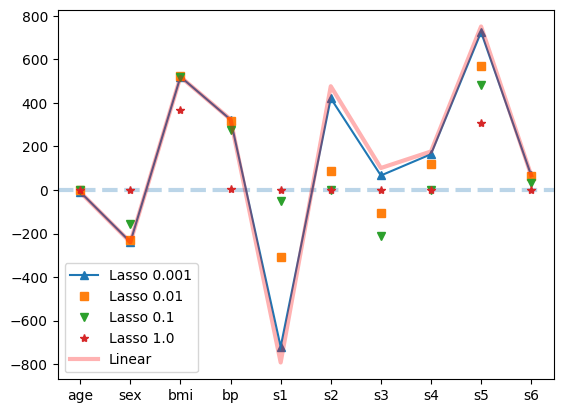

In [31]:
# y = 0 보조선 추가
plt.axhline(y = 0, linestyle='--', linewidth = 3, alpha = 0.3)

plt.plot(lasso_df.loc[0.001, ], '^-', label ='Lasso 0.001')
plt.plot(lasso_df.loc[0.01, ], 's', label = 'Lasso 0.01')
plt.plot(lasso_df.loc[0.1, ], 'v', label = 'Lasso 0.1')
plt.plot(lasso_df.loc[1.0, ], '*', label ='Lasso 1.0')

plt.plot(lr.coef_, 'r', linewidth=3, alpha = 0.3, label='Linear')

plt.legend()

plt.show()

#### 연습
- train : test = 75 : 25 비율로 생성
- 단순 선형 회귀, Lasso 모델을 이용하여 당뇨병 데이터 학습 및 평가하여 평가 지표를 하나 생성
    - Lasso Alpha는 0.01, 0.1 2개의 모델을 생성
- MSE, R2 Score의 값들을 통해 성능 비교

In [32]:
x = df.values
y = diabetes['target']

In [33]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# 독립, 종속 변수를 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size= 0.25, random_state=42
)

In [35]:
# 모델을 생성 
lr = LinearRegression()
lasso1 = Lasso(alpha=0.01)
lasso2 = Lasso(alpha=0.1)
lasso3 = Lasso(alpha=1)

In [36]:
# 모델에 데이터를 학습 
lr.fit(X_train, Y_train)
lasso1.fit(X_train, Y_train)
lasso2.fit(X_train, Y_train)
lasso3.fit(X_train, Y_train)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [37]:
# 학습된 모델을 이용하여 예측
pred_lr = lr.predict(X_test)
pred_lasso1 = lasso1.predict(X_test)
pred_lasso2 = lasso2.predict(X_test)
pred_lasso3 = lasso3.predict(X_test)

In [38]:
# 평가 지표 mse 생성 
mse_lr = mean_squared_error(Y_test, pred_lr)
mse_lasso1 = mean_squared_error(Y_test, pred_lasso1)
mse_lasso2 = mean_squared_error(Y_test, pred_lasso2)
mse_lasso3 = mean_squared_error(Y_test, pred_lasso3)

In [39]:
print(round(mse_lr, 4))
print(round(mse_lasso1, 4))
print(round(mse_lasso2, 4))
print(round(mse_lasso3, 4))

2848.3107
2831.0002
2753.9218
3433.1555


In [40]:
r2_lr = r2_score(Y_test, pred_lr)
r2_lasso1 = r2_score(Y_test, pred_lasso1)
r2_lasso2 = r2_score(Y_test, pred_lasso2)
r2_lasso3 = r2_score(Y_test, pred_lasso3)

In [41]:
print(round(r2_lr, 4))
print(round(r2_lasso1, 4))
print(round(r2_lasso2, 4))
print(round(r2_lasso3, 4))

0.4849
0.488
0.502
0.3791


---
## 엘라스틱넷
- 릿지 회귀, 라쏘 회귀를 절충한 알고리즘
    - 라쏘가 변수를 과도하게 제거하거나, 릿지가 과적합을 충분하게 억제하지 못하는 경우에 중간 타협안으로 사용
- L1, L2 페널티를 혼합 -> 혼합 비율 지정 가능

- 매개 변수
    - <span style="color:#ffd33d">**alpha**</span>
        </br>: 전체 규제의 강도
        - 기본값: 1.0
    - <span style="color:#ffd33d">**l1_ratio**</span>
        </br>: L1 페널티의 비중
        - 기본값: 0.5
            - 0 : 릿지 회귀
            - 1 : 라쏘 회귀
            - 0과 1 사이의 값 : 엘라스틱넷

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
alpha = np.logspace(-3, 1, 5)

data = []

for a in alpha:
    ela = ElasticNet(alpha = a)
    ela.fit(x, y)
    data.append(ela.coef_)

ela_df = pd.DataFrame(data, index=alpha, columns=df.columns)
ela_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


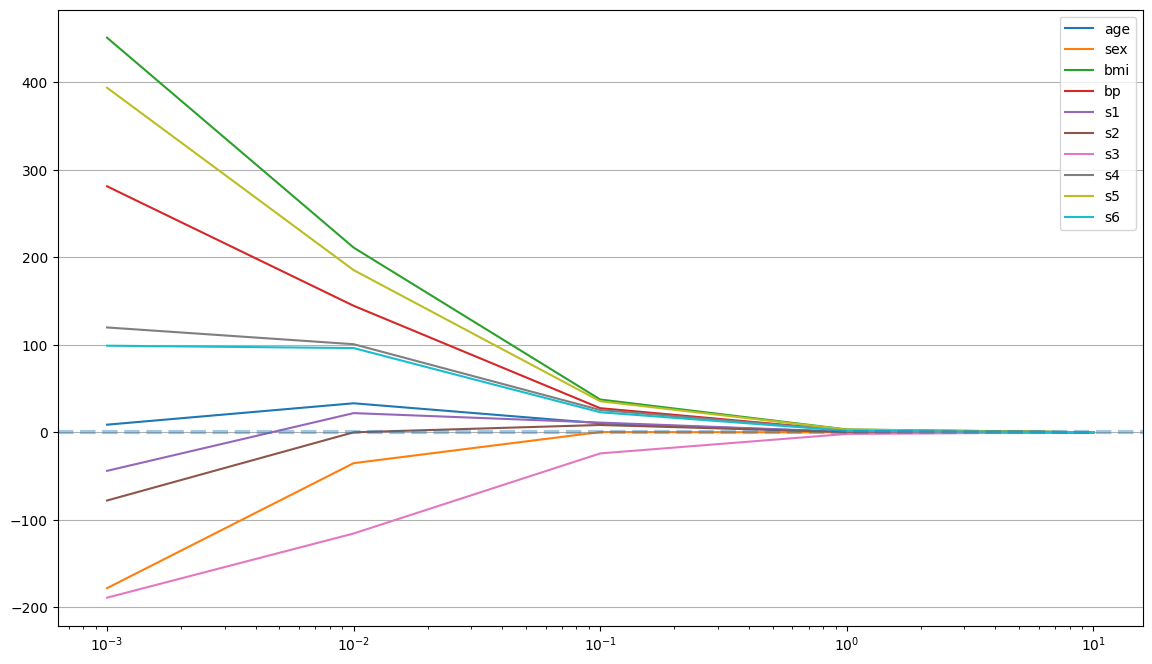

In [44]:
# 회귀 계수를 그래프로 시각화 
plt.figure(figsize=(14, 8))
plt.semilogx(ela_df)

plt.legend(labels = ela_df.columns, bbox_to_anchor=(1,1))

plt.axhline(y = 0, linestyle='--', linewidth=3, alpha=0.4)
plt.grid(axis='y')

plt.show()

In [45]:
# 엘라스틱넷의 alpha에 따라서 실제 모델의 성능을 확인 
ela1 = ElasticNet(alpha=0.01)
ela2 = ElasticNet(alpha=0.1)
ela3 = ElasticNet(alpha=1)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [47]:
ela1.fit(X_train, Y_train)
ela2.fit(X_train, Y_train)
ela3.fit(X_train, Y_train)

,alpha,1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [48]:
pred_ela1 = ela1.predict(X_test)
pred_ela2 = ela2.predict(X_test)
pred_ela3 = ela3.predict(X_test)

In [49]:
mse_ela1 = mean_squared_error(Y_test, pred_ela1)
mse_ela2 = mean_squared_error(Y_test, pred_ela2)
mse_ela3 = mean_squared_error(Y_test, pred_ela3)

In [50]:
print(round(mse_ela1, 4))
print(round(mse_ela2, 4))
print(round(mse_ela3, 4))

3318.5057
4775.4668
5311.2128


---
#### 연습
- sklearn 라이브러리 안에 있는 datasets들 중 fetch_california_housing 함수 로드
    - fetch_california_housing 데이터 안 받아지면 강사님 GitHub에서 저장
- 해당 함수를 이용하여 샘플 데이터를 변수에 저장
- 샘플 데이터에서 독립 변수와 종속 변수를 각각 X, Y에 대입하여 저장
- train : test = 7 : 3 비율로 데이터 분할
- 단순 선형 회귀, 엘라스틱넷을 이용하여 모델의 성능 검증
    - alpha : 0.01, 0.1, 1
    - l1_ratio 매개 변수 : 0, 0.5, 1
- 평가 지표로 MSE 이용
- 가장 성능이 좋은 모델을 확인

In [51]:

from sklearn.datasets import fetch_california_housing
import pandas as pd 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet

In [52]:
# 샘플 데이터 로드 
data = fetch_california_housing()

In [53]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [54]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [55]:
# 독립 변수
x = data['data']
y = data['target']

In [56]:
cali = pd.DataFrame(data['data'], columns= data['feature_names'])
cali['price'] = data['target']

In [57]:
cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [58]:
# cali 데이터프레임에서 price를 예측하기 위해
# 독립 변수: price를 제외한 나머지 컬럼들
# 종속 변수: price
x = cali.drop( 'price', axis= 1 ).values
y = cali['price'].values

In [59]:
# train, test로 데이터 분할
# X는 대문자, y는 소문자인 경우가 많음
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y,test_size= 0.3, random_state= 42
)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(14448, 8)
(6192, 8)
(14448,)
(6192,)


In [61]:
# 단순 선형 모델 생성
lr = LinearRegression()
# train 데이터를 이용하여 학습
lr.fit(X_train, Y_train)
# X_test를 이용하여 데이터 예측 -> 집값 예측 가격을 출력
pred_lr = lr.predict(X_test)
# 실제 가격: Y_test, 예측 가격: pred_lr
# MSE -> Y_test와 pred_lr의 차이를 제곱한 뒤 평균
mse_lr = mean_squared_error(Y_test, pred_lr)
r2_lr = r2_score(Y_test, pred_lr)

In [62]:
print(mse_lr)
print(r2_lr)

0.5305677824766757
0.595770232606166


In [63]:
# 9개의 ElasticNet 모델 생성
alpha = [0.01, 0.1, 1]
ratio = [0, 1, 0.5]
model_names = ['Ridge', 'Lasso', 'ElasticNet']

# 반복문의 결과를 저장할 수 있는 빈 딕셔너리 생성
model_result = {}

# 위의 3개의 리스트를 이용하여 반복문 생성

# 첫 번째 반복문 - ratio, model_names 이용
for r, name in zip( ratio, model_names ):
    # r -> ratio의 각각의 항목
    # name -> model_names의 각각의 항목
    # pass
    
    # 규제의 강도인 alpha를 이용하여 반복문 생성
    for a in alpha:
        # a -> alpha의 각각의 항목 (규제의 강도)

        # 모델 생성
        ela = ElasticNet(alpha= a, l1_ratio= r)
        # 모델 학습
        ela.fit(X_train, Y_train)
        # 예측 값 생성
        pred_ela = ela.predict(X_test)
        # 평가 지표 생성
        mse_ela = mean_squared_error(Y_test, pred_ela)
        r2_ela = r2_score(Y_test, pred_ela)
        # 반복 실행마다 딕셔너리에 mse, r2 추가
        model_result[f'{name}_{a}'] = [round(mse_ela, 3), round(r2_ela, 3)]

c:\Users\student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.853e+03, tolerance: 1.936e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.208e+03, tolerance: 1.936e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one o

In [64]:
# pass로 제대로 합쳐졌는지 중간 확인
list(zip(ratio, model_names))
# 출력: [(0, 'Ridge'), (1, 'Lasso'), (0.5, 'ElasticNet')]

[(0, 'Ridge'), (1, 'Lasso'), (0.5, 'ElasticNet')]

In [65]:
# model_result
# 잘 나오는지 확인해보고

# 단순 선형 회귀 데이터 추가
model_result['Linear'] = [round(mse_lr, 3), round(r2_lr, 3)]

In [66]:
model_result

{'Ridge_0.01': [0.526, 0.599],
 'Ridge_0.1': [0.534, 0.593],
 'Ridge_1': [0.623, 0.526],
 'Lasso_0.01': [0.525, 0.6],
 'Lasso_0.1': [0.597, 0.545],
 'Lasso_1': [0.935, 0.288],
 'ElasticNet_0.01': [0.525, 0.6],
 'ElasticNet_0.1': [0.557, 0.576],
 'ElasticNet_1': [0.756, 0.424],
 'Linear': [0.531, 0.596]}

In [67]:
models = pd.DataFrame(model_result, index= ['MSE', 'R2_score']).T
models

,MSE,R2_score
Ridge_0.01,0.526,0.599
Ridge_0.1,0.534,0.593
Ridge_1,0.623,0.526
Lasso_0.01,0.525,0.600
Lasso_0.1,0.597,0.545
Lasso_1,0.935,0.288
ElasticNet_0.01,0.525,0.600
ElasticNet_0.1,0.557,0.576
ElasticNet_1,0.756,0.424
Linear,0.531,0.596


In [68]:
# 보기에 조금 더 깔끔한 형태
models.sort_values('R2_score', ascending= False)

,MSE,R2_score
ElasticNet_0.01,0.525,0.600
Lasso_0.01,0.525,0.600
Ridge_0.01,0.526,0.599
Linear,0.531,0.596
Ridge_0.1,0.534,0.593
ElasticNet_0.1,0.557,0.576
Lasso_0.1,0.597,0.545
Ridge_1,0.623,0.526
ElasticNet_1,0.756,0.424
Lasso_1,0.935,0.288
